In [1]:
!pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 24.9 MB/s eta 0:00:0000:0100:01


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 111 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.60 MiB | 1.84 MiB/s, done.
Resolving deltas: 100% (10962/10962), done.


In [6]:
pip install -r requirements.txt 

  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 10.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/divyanshyadav/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-7 Python-3.9.12 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
image="https://cdn.racingnews365.com/2022/Leclerc/_1125x633_crop_center-center_85_none/37-bahrain-sunday-Large.jpg?v=1647878054"

In [5]:
result=model(image)
result.print()

image 1/1: 633x1125 4 persons, 1 tennis racket
Speed: 1188.9ms pre-process, 140.9ms inference, 4.3ms NMS per image at shape (1, 3, 384, 640)


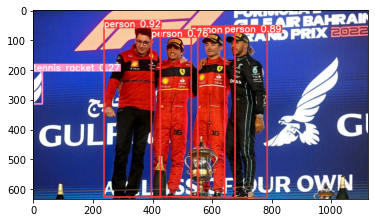

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [7]:
cap = cv2.VideoCapture('/Users/divyanshyadav/Downloads/seb_f1.mov')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
import uuid   # Unique identifier
import os
import time

In [9]:
IMAGES_PATH = os.path.join('data', 'train') #/data/images
labels = ['awake', 'drowsy']
# number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [17]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/train/awake.f7f34a18-0b98-11ee-8f49-acde48001122.jpg


In [10]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (1242/1242), done.


In [20]:
!pip install --upgrade pyqt5 lxml


In [3]:
LABELIMG_PATH = os.path.join('data', 'labeling')

In [4]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [5]:
if os.name == 'posix':
    !cd {LABELIMG_PATH} && make qt5py3

pyrcc5 -o libs/resources.py resources.qrc


In [7]:
!cd {LABELIMG_PATH} && python labelImg.py

Image:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-05 101141.png -> Annotation:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-05 101141.txt
[('stone', [(1075, 332), (1182, 332), (1182, 500), (1075, 500)], None, None, False), ('stone', [(500, 133), (659, 133), (659, 257), (500, 257)], None, None, False), ('stone', [(781, 499), (877, 499), (877, 568), (781, 568)], None, None, False), ('stone', [(662, 490), (775, 490), (775, 545), (662, 545)], None, None, False), ('stone', [(846, 80), (1001, 80), (1001, 206), (846, 206)], None, None, False), ('stone', [(814, 210), (1058, 210), (1058, 346), (814, 346)], None, None, False), ('stone', [(1027, 583), (1148, 583), (1148, 662), (1027, 662)], None, None, False)]
Image:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-05 101156.png -> Annotation:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-05 101156.txt
Image:/Users/divyanshyadav/Untitled Folder/data5/valimg/S

Image:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-07 at 9.54.08 PM.png -> Annotation:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-07 at 9.54.08 PM.txt
Cancel creation.
Image:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-07 at 9.54.18 PM.png -> Annotation:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-07 at 9.54.18 PM.txt
Image:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-07 at 9.54.24 PM.png -> Annotation:/Users/divyanshyadav/Untitled Folder/data5/valimg/Screenshot 2023-07-07 at 9.54.24 PM.txt


In [7]:
!cd yolov5 && python train.py --img 320 --batch 10 --epochs 150 --data dataset7.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset7.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=10, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 15 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to '/Users/divyanshyadav/Untitled': No such file or directory
YOLOv5 🚀 2023-6-14 Python-3.9.12 torch-2.0.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5

                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.205      0.246      0.114     0.0264

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     19/149         0G     0.1023    0.04754   0.005231         48        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452       0.23      0.352      0.188     0.0476

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     20/149         0G     0.1087    0.03866   0.005031         57        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.324      0.427      0.289     0.0879

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     21/149         0G     0.1034    0.04153   0.005725         29        320: 1
          


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     42/149         0G    0.07796    0.04648   0.003459         47        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.359       0.52      0.386      0.124

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     43/149         0G    0.07138    0.04791    0.00374         68        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.369      0.573       0.42      0.178

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     44/149         0G    0.06081    0.04566   0.004096         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.555      0.627      0.568      0.239

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     67/149         0G    0.05642    0.03918   0.003261         32        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.812      0.732      0.821       0.42

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     68/149         0G    0.05449    0.04021   0.003133         17        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.795      0.712      0.798      0.384

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     69/149         0G     0.0525    0.04814   0.003015         46        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.643      0.611      0.688      0.259

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     92/149         0G    0.04724    0.04022   0.002478         49        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.795      0.807      0.876       0.51

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     93/149         0G    0.04326    0.04172   0.002493         41        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.655      0.681      0.744      0.351

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     94/149         0G    0.05688    0.04488   0.002521         32        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452       0.61      0.796      0.735      0.416

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    117/149         0G     0.0459    0.04429   0.002149         71        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.817      0.832      0.892      0.514

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    118/149         0G    0.04443    0.03714   0.002169         42        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.812      0.838      0.896      0.542

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    119/149         0G    0.04193    0.03991   0.002175         28        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.821      0.823      0.894      0.538

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    142/149         0G    0.04204    0.04173   0.001724         37        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.839      0.825      0.906       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    143/149         0G    0.03983    0.03699    0.00179         40        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.842      0.832      0.908      0.566

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    144/149         0G     0.0391    0.03989   0.001763         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         63        452      0.847      0.832      0.909      0.568

      Epo

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp28/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/divyanshyadav/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-7-10 Python-3.9.12 torch-2.0.1 CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data3', 'images', 'Screenshot 2023-07-05 102126.png')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 1007x1920 29 stones
Speed: 119.9ms pre-process, 69.6ms inference, 1.0ms NMS per image at shape (1, 3, 352, 640)


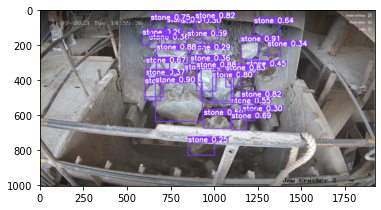

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [81]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

OpenCV: camera access has been denied. Either run 'tccutil reset Camera' command in same terminal to reset application authorization status, either modify 'System Preferences -> Security & Privacy -> Camera' settings for your application.
OpenCV: camera failed to properly initialize!


In [4]:

def POINTS(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE :  
        colorsBGR = [x, y]
        print(colorsBGR)
        

cv2.namedWindow('ROI')
cv2.setMouseCallback('ROI', POINTS)

cap=cv2.VideoCapture('/Users/divyanshyadav/Downloads/liv.mov')




In [ ]:

count=0
while True:
    ret,frame=cap.read()
    frame = cv2.resize(frame, (1080, 720))
    roi=frame[505:573,150:580]
    results = model(roi)
    for index, row in results.pandas().xyxy[0].iterrows():
        x1 = int(row['xmin'])
        y1 = int(row['ymin'])
        x2 = int(row['xmax'])
        y2 = int(row['ymax'])
        d=(row['name'])
        print(d)
        cv2.rectangle(roi,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow("ROI",frame)
    if cv2.waitKey(1)&0xFF==27:
        break
        
cap.release()
cv2.destroyAllWindows()

[897, 534]
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
[841, 561]
stone
[852, 567]
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
s

stone
stone
stone
stone
stone
stone
stone
[751, 529]
[747, 529]
stone
[725, 525]
stone
[713, 520]
stone
[690, 519]
stone
[559, 486]
stone
[368, 378]
stone
[332, 342]
stone
[332, 342]
stone
stone
stone
[322, 338]
stone
[267, 298]
stone
[174, 210]
stone
[100, 130]
stone
[53, 87]
stone
[8, 42]
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone


In [14]:
import cv2
cap=cv2.VideoCapture('/Users/divyanshyadav/Downloads/liv.mov')
while True:
    ret,frame=cap.read()
    frame = cv2.resize(frame, (1080, 720))
    roi = frame[505:573,250:590]
    cv2.imshow("roi",roi)
    if cv2.waitKey(1000):
        break
cap.release()
cv2.destroyAllWindows()